In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
co2 = pd.read_csv('../data/cleaned/co2_emissions_kt_by_country_clean.csv')
gdp = pd.read_csv('../data/cleaned/gdp_clean.csv')
temp_county = pd.read_csv('../data/cleaned/global_temperatures_by_country_1980_2012_cleaned.csv')

In [69]:
date_begin = '1980-01-01' 
date_end = '2009-01-01'
year_diff_begin = 1980
year_diff_end = 2009
year_diff_begin_str = '1980'
year_diff_end_str = '2009'

In [70]:
co2 = co2[(co2['year']>=date_begin) & (co2['year']<=date_end)]
co2.head()

,country_code,country_name,year,co2_in_kt
20,ABW,Aruba,1980-01-01,10498.621
21,ABW,Aruba,1981-01-01,9999.909
22,ABW,Aruba,1982-01-01,11180.683
23,ABW,Aruba,1983-01-01,5746.189
24,ABW,Aruba,1984-01-01,14348.971


In [71]:
# find out the top 10 countries with the highest co2 emission in the years 2000-2010
co2rank = pd.pivot_table(co2, index='country_name', values='co2_in_kt', aggfunc=sum).sort_values('co2_in_kt', ascending=False, ignore_index=False
)
#co2rank.head(50)

C:\Users\schue\AppData\Local\Temp\ipykernel_18936\3857256921.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  co2rank = pd.pivot_table(co2, index='country_name', values='co2_in_kt', aggfunc=sum).sort_values('co2_in_kt', ascending=False, ignore_index=False


In [72]:
country_top10_co2 = ['United States','China','Russian Federation','Japan','India','Germany','United Kingdom','Canada','Italy','France']

In [73]:
co2_top10 = co2[co2['country_name'].isin(country_top10_co2)]
#co2_top10

In [74]:
co2_top10_pivot = co2_top10.pivot_table(index='country_name', values='co2_in_kt', aggfunc=sum)
#co2_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_18936\2476684700.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  co2_top10_pivot = co2_top10.pivot_table(index='country_name', values='co2_in_kt', aggfunc=sum)


<Axes: xlabel='co2_in_kt', ylabel='country_name'>

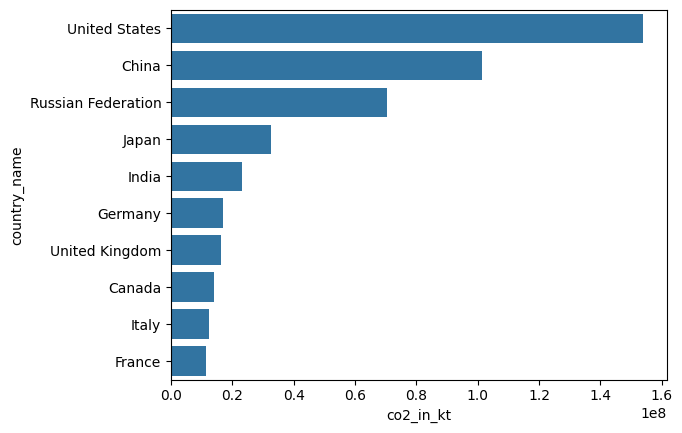

In [75]:
sns.barplot(data=co2_top10_pivot, y='country_name', x='co2_in_kt', order=country_top10_co2)

In [76]:
country_top10_temp = ['United States','China','Russia','Japan','India','Germany','United Kingdom','Canada','Italy','France']

In [77]:
#temp_county['country'].unique()

In [78]:
temp_county_top10 = temp_county[temp_county['country'].isin(country_top10_temp)]
temp_county_top10.head()

,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country
15048,99791,1980-01-01,-22.529,0.273,Canada
15049,99792,1980-02-01,-18.497,0.232,Canada
15050,99793,1980-03-01,-14.981,0.218,Canada
15051,99794,1980-04-01,-4.651,0.398,Canada
15052,99795,1980-05-01,4.375,0.223,Canada


In [79]:
temp_county_top10['country'].unique()

array(['Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan',
       'Russia', 'United Kingdom', 'United States'], dtype=object)

In [80]:
temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])

C:\Users\schue\AppData\Local\Temp\ipykernel_18936\2006895314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['date']=pd.to_datetime(temp_county_top10['date'])


In [81]:
temp_county_top10['year']= temp_county_top10['date'].dt.year
temp_county_top10

C:\Users\schue\AppData\Local\Temp\ipykernel_18936\1751133901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_county_top10['year']= temp_county_top10['date'].dt.year


,Unnamed: 0,date,average_temperature,average_temperature_unvertainty,country,year
15048,99791,1980-01-01,-22.529,0.273,Canada,1980
15049,99792,1980-02-01,-18.497,0.232,Canada,1980
15050,99793,1980-03-01,-14.981,0.218,Canada,1980
15051,99794,1980-04-01,-4.651,0.398,Canada,1980
15052,99795,1980-05-01,4.375,0.223,Canada,1980
...,...,...,...,...,...,...
89887,557807,2012-08-01,21.422,0.251,United States,2012
89888,557808,2012-09-01,17.036,0.185,United States,2012
89889,557809,2012-10-01,9.688,0.225,United States,2012
89890,557810,2012-11-01,3.330,0.120,United States,2012


In [82]:
temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()
temp_county_top10_pivot

C:\Users\schue\AppData\Local\Temp\ipykernel_18936\2060332134.py:1: FutureWarning: The provided callable <function mean at 0x000002A97EE62E80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  temp_county_top10_pivot = pd.pivot_table(temp_county_top10, index=['country','year'], values='average_temperature', aggfunc=np.mean).reset_index()


,country,year,average_temperature
0,Canada,1980,-4.416917
1,Canada,1981,-2.867250
2,Canada,1982,-5.875167
3,Canada,1983,-4.751750
4,Canada,1984,-4.634250
...,...,...,...
325,United States,2008,8.951417
326,United States,2009,9.137083
327,United States,2010,9.505583
328,United States,2011,9.549917


In [83]:
list_of_row_index = temp_county_top10_pivot[temp_county_top10_pivot['year'].isin([year_diff_begin,year_diff_end]) ==False].index.tolist()
temp_county_top10_pivot_dropyears = temp_county_top10_pivot.drop(list_of_row_index,axis=0)
temp_county_top10_pivot_dropyears

,country,year,average_temperature
0,Canada,1980,-4.416917
29,Canada,2009,-4.135083
33,China,1980,6.950083
62,China,2009,7.809500
66,France,1980,12.555833
95,France,2009,13.941667
99,Germany,1980,7.727250
128,Germany,2009,9.359167
132,India,1980,24.593083
161,India,2009,25.146667


In [84]:
temp_county_top10_diff = pd.pivot(temp_county_top10_pivot_dropyears, index='country', columns='year', values='average_temperature').reset_index()
temp_county_top10_diff

year,country,1980,2009
0,Canada,-4.416917,-4.135083
1,China,6.950083,7.809500
2,France,12.555833,13.941667
3,Germany,7.727250,9.359167
4,India,24.593083,25.146667
5,Italy,12.239583,14.052917
6,Japan,11.795083,12.933833
7,Russia,-5.420750,-4.608500
8,United Kingdom,8.643167,9.453333
9,United States,9.135500,9.137083


In [85]:
temp_county_top10_diff.columns = ['country',year_diff_begin_str,year_diff_end_str]
temp_county_top10_diff

,country,1980,2009
0,Canada,-4.416917,-4.135083
1,China,6.950083,7.809500
2,France,12.555833,13.941667
3,Germany,7.727250,9.359167
4,India,24.593083,25.146667
5,Italy,12.239583,14.052917
6,Japan,11.795083,12.933833
7,Russia,-5.420750,-4.608500
8,United Kingdom,8.643167,9.453333
9,United States,9.135500,9.137083


In [86]:
temp_county_top10_diff['temp_diff']=temp_county_top10_diff[year_diff_end_str]-temp_county_top10_diff[year_diff_begin_str]
temp_county_top10_diff

,country,1980,2009,temp_diff
0,Canada,-4.416917,-4.135083,0.281833
1,China,6.950083,7.809500,0.859417
2,France,12.555833,13.941667,1.385833
3,Germany,7.727250,9.359167,1.631917
4,India,24.593083,25.146667,0.553583
5,Italy,12.239583,14.052917,1.813333
6,Japan,11.795083,12.933833,1.138750
7,Russia,-5.420750,-4.608500,0.812250
8,United Kingdom,8.643167,9.453333,0.810167
9,United States,9.135500,9.137083,0.001583


<Axes: xlabel='co2_in_kt', ylabel='country_name'>

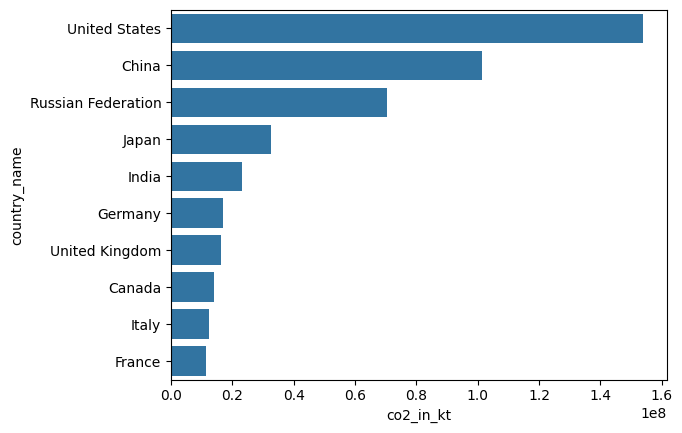

In [87]:
sns.barplot(data=co2_top10_pivot, y='country_name', x='co2_in_kt', order=country_top10_co2)

<Axes: xlabel='temp_diff', ylabel='country'>

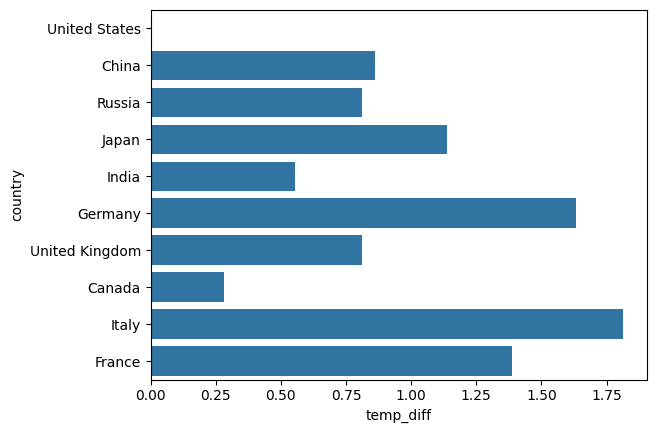

In [88]:
sns.barplot(data=temp_county_top10_diff, y='country', x='temp_diff', order=country_top10_temp)